In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv(r'C:\Users\aryan\Desktop\datasets\train_walmart.csv')
train_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True


In [3]:
features_df = pd.read_csv(r'C:\Users\aryan\Desktop\datasets\features.csv')
stores_df = pd.read_csv(r'C:\Users\aryan\Desktop\datasets\stores.csv')

In [4]:
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [5]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [6]:
## Using inner joins to combine the data frames into one .

In [7]:
data_m = features_df.merge(stores_df,how = 'inner',on=['Store'])

In [8]:
import datetime as dt

In [9]:
data_m['Date'] = pd.to_datetime(data_m['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [10]:
data = data_m.merge(train_df,how = 'inner',on = ['Store','Date','IsHoliday'])
data.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38


In [11]:
def makeplot(col1):
    col2 = data['Weekly_Sales']
    plt.scatter(col1,col2)
    plt.show()

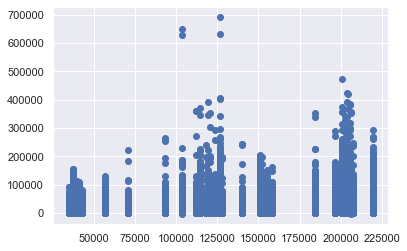

In [12]:
makeplot(data['Size'])

In [13]:
data['Week'] = data.Date.dt.isocalendar().week
data['Year'] = data.Date.dt.isocalendar().year

In [14]:
data.head(1)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,Week,Year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.5,5,2010


In [15]:
weekly_sales = data[data['Year']==2011].groupby('Week')['Weekly_Sales'].mean()

<AxesSubplot:xlabel='Week'>

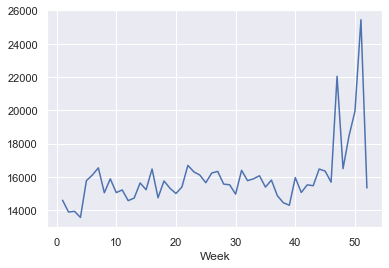

In [16]:
sns.lineplot(weekly_sales.index,weekly_sales.values)

In [17]:
weekly_sales_2 = data[data['Year']==2010].groupby('Week')['Weekly_Sales'].mean()

In [18]:
weekly_sales_3= data[data['Year']==2012].groupby('Week')['Weekly_Sales'].mean()

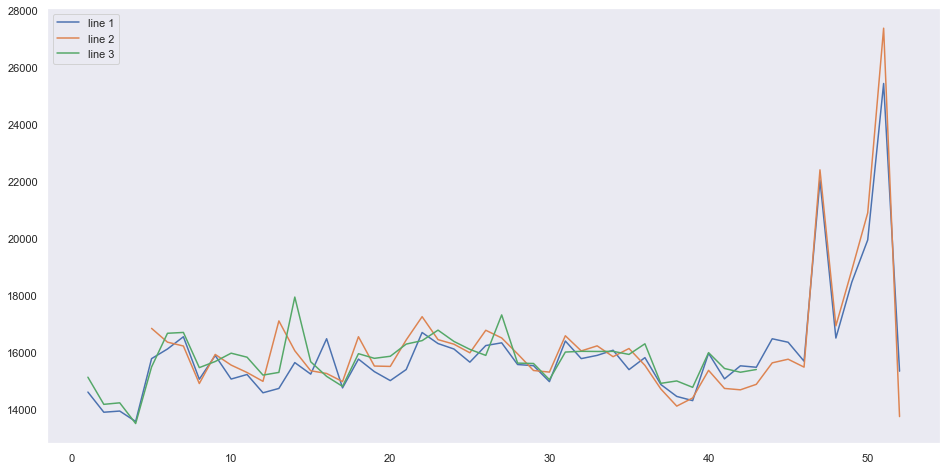

In [19]:
plt.figure(figsize=(16,8))
plt.plot(weekly_sales.index,weekly_sales.values, label = "line 1")
plt.plot(weekly_sales_2.index,weekly_sales_2.values, label = "line 2")
plt.plot(weekly_sales_3.index,weekly_sales_3.values, label = "line 3")
plt.legend()
plt.grid()
plt.show()


In [20]:
max_data = data.groupby('Store')['Weekly_Sales'].mean().nlargest(5)
max_data

Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
Name: Weekly_Sales, dtype: float64

<AxesSubplot:ylabel='Weekly_Sales'>

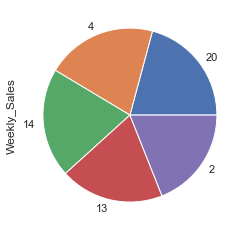

In [21]:
data.groupby('Store')['Weekly_Sales'].mean().nlargest(5).plot(kind = 'pie')

In [22]:
data.Store.nunique()

45

<AxesSubplot:xlabel='Store'>

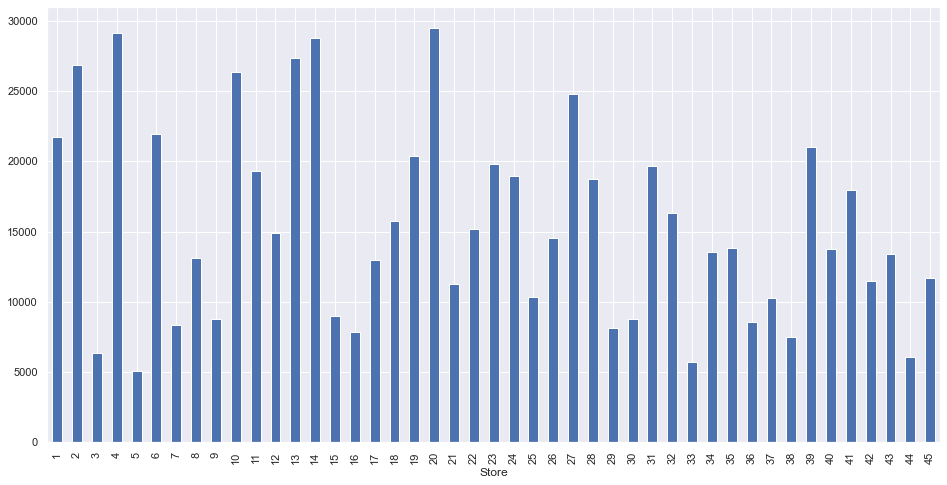

In [23]:
plt.figure(figsize=(16,8))
data.groupby('Store')['Weekly_Sales'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Dept'>

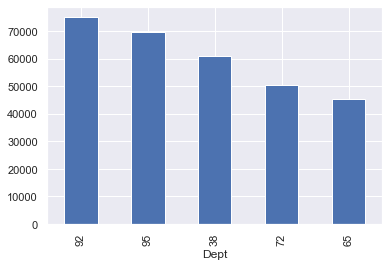

In [24]:
data.groupby('Dept')['Weekly_Sales'].mean().nlargest(5).plot(kind = 'bar')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'Store'),
  Text(0, 1.5, 'Temperature'),
  Text(0, 2.5, 'Fuel_Price'),
  Text(0, 3.5, 'MarkDown1'),
  Text(0, 4.5, 'MarkDown2'),
  Text(0, 5.5, 'MarkDown3'),
  Text(0, 6.5, 'MarkDown4'),
  Text(0, 7.5, 'MarkDown5'),
  Text(0, 8.5, 'CPI'),
  Text(0, 9.5, 'Unemployment'),
  Text(0, 10.5, 'IsHoliday'),
  Text(0, 11.5, 'Size'),
  Text(0, 12.5, 'Dept'),
  Text(0, 13.5, 'Weekly_Sales'),
  Text(0, 14.5, 'Week'),
  Text(0, 15.5, 'Year')])

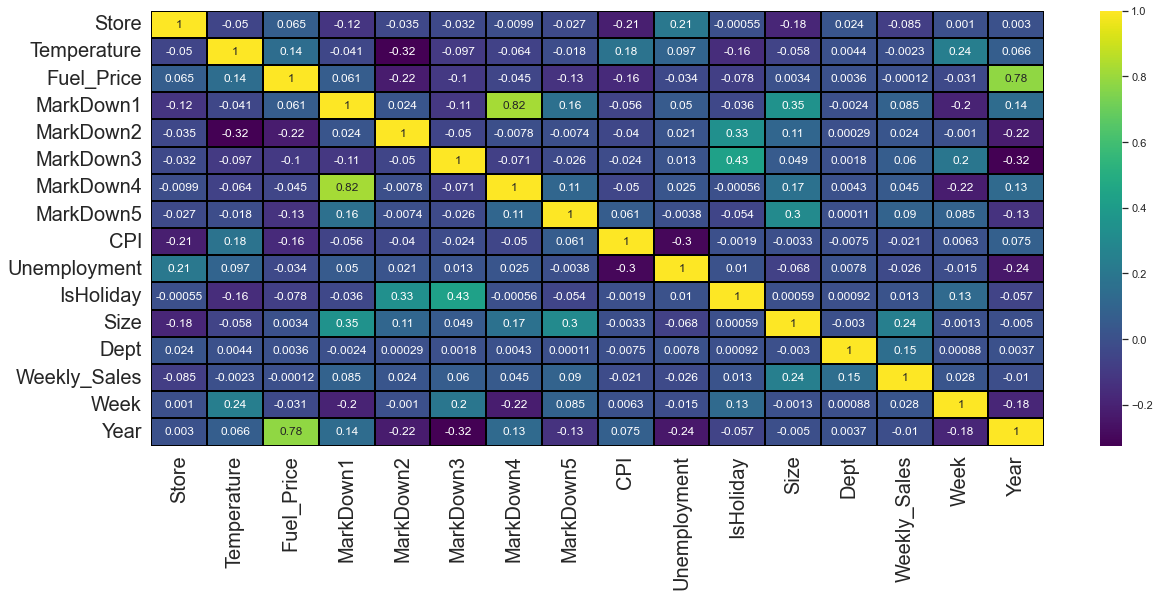

In [29]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),cmap = 'viridis',linewidths=2.0,linecolor = 'black',annot = True)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

<AxesSubplot:xlabel='Type'>

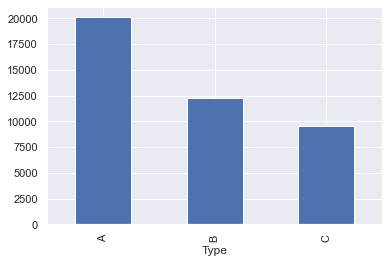

In [51]:
data.groupby('Type')['Weekly_Sales'].mean().plot(kind = 'bar')

<AxesSubplot:ylabel='Weekly_Sales'>

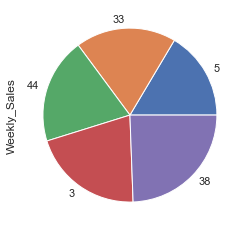

In [47]:
data.groupby('Store')['Weekly_Sales'].mean().nsmallest(5).plot(kind = 'pie')